In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

## Downloading and loading the Taxi dataset

You may download the data from https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip

Or, run the following cell (on Linux).

In [2]:
!wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip
!unzip nyc_taxi.zip

zsh:1: command not found: wget
unzip:  cannot find or open nyc_taxi.zip, nyc_taxi.zip.zip or nyc_taxi.zip.ZIP.


In [3]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [4]:
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime',
                                               'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

In [5]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


### Descriptive statistics

In [14]:
px.count(), px.min(), px.max()

(846945, 29.417137499999995, 29.714313055555557)

In [22]:
px.mean(), px.median(), px.std(), px.sem()

(29.45134580776863,
 29.449418333333334,
 0.009761694274451234,
 1.0607122822149915e-05)

## plotting histogram

<AxesSubplot:>

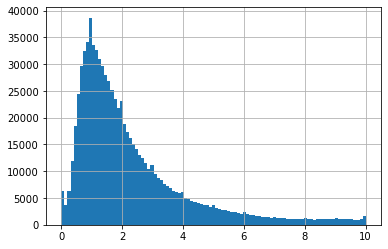

In [18]:
data.trip_distance.hist(bins=np.linspace(0., 10., 100))

## Ploting with matplotlib

In [6]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [7]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [8]:
p_lng

0        -73.955925
1        -74.005501
2        -73.969955
3        -73.991432
4        -73.966225
            ...    
846940   -73.992058
846941   -73.994949
846942   -73.993492
846943   -73.978477
846944   -73.987206
Name: pickup_longitude, Length: 846945, dtype: float64

In [9]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [10]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

In [11]:
px

0         29.456688
1         29.442916
2         29.452790
3         29.446824
4         29.453826
            ...    
846940    29.446651
846941    29.445847
846942    29.446252
846943    29.450423
846944    29.447998
Name: pickup_longitude, Length: 846945, dtype: float64

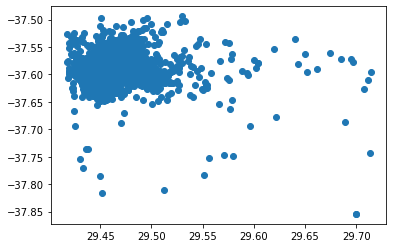

In [12]:
plt.scatter(px, py)

(29.4, 29.55, -37.63, -37.54)

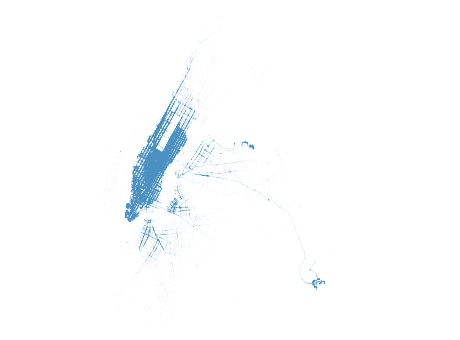

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')

## selecting data

In [23]:
data[['trip_distance', 'trip_time_in_secs']].head(3)

,trip_distance,trip_time_in_secs
0,0.61,300
1,3.28,960
2,1.50,386


In [24]:
data.loc[0]

medallion             76942C3205E17D7E7FE5A9F709D16434
hack_license          25BA06A87905667AA1FE5990E33F0E2E
vendor_id                                          VTS
rate_code                                            1
store_and_fwd_flag                                 NaN
pickup_datetime                    2013-01-01 00:00:00
dropoff_datetime                   2013-01-01 00:05:00
passenger_count                                      3
trip_time_in_secs                                  300
trip_distance                                 0.610000
pickup_longitude                            -73.955925
pickup_latitude                              40.781887
dropoff_longitude                           -73.963181
dropoff_latitude                             40.777832
Name: 0, dtype: object

In [25]:
data.loc[[0, 100000]]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
100000,7461F7106D33D3A5775F4245724606FD,BACEA353BB4106A005BB7836BDCAC0C3,VTS,1,NaN,2013-02-12 18:10:00,2013-02-12 18:20:00,2,600,2.02,-73.966454,40.770512,-73.958862,40.778042


In [26]:
data.loc[1000:2000:10,
         ['trip_distance', 'trip_time_in_secs']]

,trip_distance,trip_time_in_secs
1000,1.00,441
1010,3.80,691
1020,0.00,7
1030,4.20,902
1040,3.40,1278
...,...,...
1960,7.70,883
1970,2.71,660
1980,2.30,360
1990,0.13,60


In [27]:
data.loc[data.trip_distance>50]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1853,DA2A0A9EBD9AFD25013CF83805B61D6D,A3BCE60F48302B63C4B7AAE443960704,CMT,1,N,2013-01-01 21:41:03,2013-01-01 21:56:37,1,934,52.20,-73.979576,40.743626,-73.941902,40.807281
6316,6BD1B641A1CD55803A21560299B985A7,A33DB5A909ADBFCE2AB057264141C8E9,CMT,1,N,2013-01-04 06:44:21,2013-01-04 07:17:14,1,1973,96.30,-73.959785,40.762497,-73.962440,40.662910
8683,E95D27A43DC7A5F0C015409386BB49DB,8A6EB7FA7E6A3F4A50C717871C068D72,CMT,1,N,2013-01-05 01:51:08,2013-01-05 02:23:01,1,1913,52.90,-74.006119,40.735157,-73.958694,40.714905
24381,A38882246FC6439948FA470459F94134,8A60E3668580091A4BB124E9BDAFDD89,CMT,1,N,2013-01-12 03:02:55,2013-01-12 03:24:47,1,1312,66.20,-73.966873,40.683315,-73.916885,40.754852
54723,0F48C5AE255A294B4E88ECC3CED0CFC5,C92D893B061C29C152ADF42B15317C3E,CMT,5,N,2013-01-24 21:07:13,2013-01-24 21:31:44,1,1471,79.40,-73.885735,40.771580,-73.984947,40.758060
90068,7B59F6023736C5217B613D17B4ED6A9C,F2D89276E3886C6A8D27AE463637FF36,CMT,1,N,2013-02-08 01:54:21,2013-02-08 02:02:03,1,461,70.90,-73.985512,40.742313,-73.993950,40.720837
115471,FB0FAE6EABFE14F45600AD382B52EFE5,0D39DD3359634605EAC8B451295E8186,CMT,1,N,2013-02-18 19:52:08,2013-02-18 20:07:33,1,925,67.20,-73.874474,40.773975,-73.937866,40.723824
119002,A51E7B7371667690E65D88307FBBA229,3A6EDD62A2933A11545527FDE55DAC52,CMT,1,N,2013-02-20 12:20:03,2013-02-20 12:43:12,1,1389,87.90,-73.862915,40.769157,-73.973579,40.748199
134839,FA189EABBB4058AC0359AA1CF30F5313,C707B5A8C6AEF269564272AF66B37564,CMT,1,Y,2013-02-26 17:54:11,2013-02-26 18:45:03,1,3052,69.80,-73.989853,40.729340,-73.964035,40.771950
157050,C4580AE98B332B1E4B6B822B1C2D03BE,E2CB66B7D37105F7C3364DFF61E4D487,VTS,2,NaN,2013-03-07 12:34:00,2013-03-07 15:24:00,6,10200,60.14,-73.777405,40.646626,-73.982193,40.769535


In [28]:
## Computing with numbers

In [29]:
data['trip_time_in_mins'] = data.trip_time_in_secs / 60.0

In [30]:
data[['trip_time_in_secs', 'trip_time_in_mins']].head(3)

,trip_time_in_secs,trip_time_in_mins
0,300,5.000000
1,960,16.000000
2,386,6.433333


In [31]:
a = data.trip_distance[:5]
a

0    0.61
1    3.28
2    1.50
3    0.00
4    1.31
Name: trip_distance, dtype: float64

In [32]:
b = data.trip_distance[2:6]
b

2    1.50
3    0.00
4    1.31
5    5.81
Name: trip_distance, dtype: float64

In [33]:
a + b

0     NaN
1     NaN
2    3.00
3    0.00
4    2.62
5     NaN
Name: trip_distance, dtype: float64

## Groupby

In [35]:
weekly = data.groupby(data.pickup_datetime.dt.weekofyear)

/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [36]:
len(weekly)

52

In [39]:
y = weekly.size()
y

pickup_datetime
1     17042
2     15941
3     17017
4     17149
5     17372
6     15993
7     17652
8     17274
9     17695
10    17601
11    17840
12    17126
13    16566
14    17275
15    17379
16    17484
17    17294
18    17388
19    17268
20    17252
21    13704
22    16069
23    16697
24    16492
25    16212
26    16245
27    13200
28    15966
29    16389
30    15845
31    11242
32    14224
33    15048
34    15165
35    14728
36    15583
37    16949
38    16840
39    16168
40    16604
41    16704
42    16555
43    16980
44    16993
45    16979
46    16626
47    16863
48    13997
49    16716
50    16867
51    16360
52    12327
dtype: int64

In [40]:
x = weekly.pickup_datetime.first()
x
# x.head(3)

pickup_datetime
1    2013-01-01 00:00:00
2    2013-01-07 00:03:00
3    2013-01-14 00:00:51
4    2013-01-21 00:00:53
5    2013-01-28 00:00:13
6    2013-02-04 00:00:00
7    2013-02-11 00:00:00
8    2013-02-18 00:00:53
9    2013-02-25 00:00:00
10   2013-03-04 00:00:24
11   2013-03-11 00:01:00
12   2013-03-18 00:00:00
13   2013-03-25 00:00:00
14   2013-04-01 00:00:00
15   2013-04-08 00:00:54
16   2013-04-15 00:01:00
17   2013-04-22 00:00:00
18   2013-04-29 00:00:00
19   2013-05-06 00:00:00
20   2013-05-13 00:00:51
21   2013-05-20 00:01:00
22   2013-05-27 00:00:40
23   2013-06-03 00:00:00
24   2013-06-10 00:00:00
25   2013-06-17 00:02:00
26   2013-06-24 00:00:00
27   2013-07-01 00:01:52
28   2013-07-08 00:01:00
29   2013-07-15 00:02:00
30   2013-07-22 00:00:00
31   2013-07-29 00:00:22
32   2013-08-05 00:00:32
33   2013-08-12 00:01:00
34   2013-08-19 00:00:00
35   2013-08-26 00:00:00
36   2013-09-02 00:00:00
37   2013-09-09 00:00:00
38   2013-09-16 00:00:09
39   2013-09-23 00:00:00
40   2013

Text(0, 0.5, 'Taxi rides')

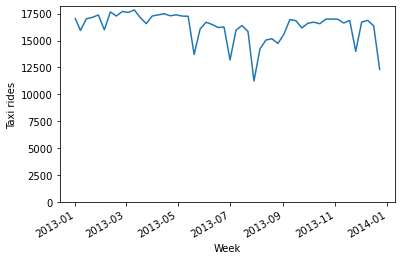

In [41]:
pd.Series(y.values, index=x).plot()
plt.ylim(0)  # Set the lower y value to 0.
plt.xlabel('Week')  # Label of the x axis.
plt.ylabel('Taxi rides')  # Label of the y axis.

## Join

In [43]:
tip = fare[['medallion', 'tip_amount']] \
      .loc[fare.tip_amount>0].groupby('medallion').mean()
print(len(tip))
tip.head(3)

13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111


Text(0, 0.5, 'Number of taxis')

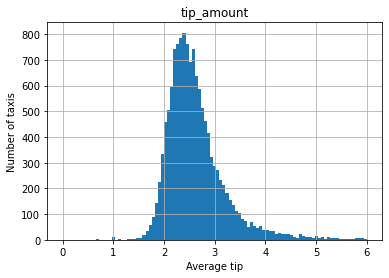

In [44]:
tip.hist(bins=np.linspace(0., 6., 100))
plt.xlabel('Average tip')
plt.ylabel('Number of taxis')

In [45]:
data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_time_in_mins,tip_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,5.000000,3.180417
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,16.000000,2.863235
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,6.433333,2.147143
